# 1.Regresion lineal simple

## 1.0 Introduccion

La regresion lineal modela la relacion entre una variable de respuesta ( $y$ ) y una variable explicativas ( $x_1$ ). El objetivo en los problemas de regresión es **predecir** el valor de una variable de respuesta ( $y$ ).

El modelo de la regresion lineal multivariables es:

\begin{equation}
y=a+b_1x_1
\end{equation}

Este modelo lo podemos expresar de manera matricial:


\begin{equation}
\begin{bmatrix}
y_1 \\
y_2  \\
.\\
.\\
. \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
a +{b_1}x_{11}\\
a +{b_1}x_{12}\\
.\\
.\\
.\\
a +{b_1}x_{1m}
\end{bmatrix}
=
\begin{bmatrix}
1 &x_{11}\\
1 &x_{12}\\
. & . \\
. & . \\
. & . \\
1 &x_{1m}
\end{bmatrix}
X
\begin{bmatrix}
a \\
b_1
\end{bmatrix}
    .......(1)
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
Y=XB
\end{equation}

Donde:

$Y:$ Es la matriz con la data de entrenamiento de la variable respuesta es del orden $m$X$1$

$X:$ Es la matriz que contine la data de entrenamiento de las variables de explicativas , tiene adicionalmente una columna de unos. Es del orden $m$$x$$2$

$B:$ Es la matriz que contine los parametros de nuestro modelo , nosotros necesitaremos hallar esta, es del orden de $2$X$1$

$x_{1j}:$ Es el valor j-enesimo de la data de entrenamiento de la $( x_1 )$ variable explicativa.

$m:$ Es el numero de muestras de la data de entrenamiento.

Una vez planteado el modelo a utilizar , se debera encontrar los parametros que le corresponde. Para la regresion lineal consiste en conocer la matriz $B$.Para calcularla debemos minimizar la funcion de coste la cual es ***Suma residual de cuadrados***.
\begin{equation}
SS_{res}={\sum_{i=1}^m}(y_i-(a+b_1x_1))^2
\end{equation}
\begin{equation}
\end{equation}

Para resolver esto tenemos veremos dos metodos de optimizacion :

*   ***Optimizacion analitica ( Minimos cuadrados )***
*   ***Optimizacion Machine learning ( Descenso de gradiente )***


## 1.1 Optimizacion analitica ( Minimos cuadrados )


Como podemos notar la solucion de la expresion $(1)$ es :


\begin{equation}
B=
\begin{bmatrix}
a \\
b_1
\end{bmatrix}
=(X^T X)^{-1}X^T Y .......(2)
\end{equation}

Al reemplazar las matrices la expresion $(1)$ en la expresion $(2)$ , se obtiene el valor de los parametros del modelo.
\begin{equation}
\end{equation}
\begin{equation}
b=\frac{Cov(x_1,y)}{Var(x_1)}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
a=prom(y)-b.prom(x_1)
\end{equation}
\begin{equation}
\end{equation}


*   $a$ , es coeficiente lineal o tangente
*   $b$ , es el coeficiente independiente



$Donde:$
\begin{equation}
Var(X)=\frac{{\sum_{i=1}^m}(x_i-prom(x))^2}{n-1}
\end{equation}
\begin{equation}
\end{equation}
\begin{equation}
Cov(X,Y)=\frac{{\sum_{i=1}^m}( x_{1i}-prom(x_1) )( y_{i}-prom(y) )}{n-1}
\end{equation}

### 1.1.0 Ejemplo 1 ( 5 min - 1 pts )

El siguiente ejemplo se trata de predecir el precio de una pizza (**Variable de respuesta**) en funcion del diametro(**Variable explicativa**).

Nuestra data de entrenamiento sera:

i  | Diametro  |Precio($)
---|  ---      |  ---
1  | 6         |7
2  | 8         |9
3  | 10        |13
4  | 14        |17.5
5  | 18        |18

\begin{equation}
\end{equation}
***Usar de guia el programa siguiente para encontar los parametros del modelo***


In [1]:
######Solucion analitica ( Minimos cuadrados )
import numpy as np

X_train = np.array([[6], [8], [10], [14], [18]])
y_train = np.array([[7], [9], [13], [17.5], [18]])

n=len(X_train)
prom_X=np.sum(X_train)/n

VarX=sum( (X_train-prom_X)**2 )/(n-1)

print(VarX[0])

23.2


### 1.1.1 Ejemplo 1 ( Solucion ) 

In [2]:
import numpy as np

X_train = np.array([[6], [8], [10], [14], [18]])
Y_train = np.array([[7], [9], [13], [17.5], [18]])

n=len(X_train)
prom_X=np.sum(X_train)/n
prom_Y=np.sum(Y_train)/n

VarX=sum( (X_train-prom_X)**2 )/(n-1)
Cov_X_Y=sum( (X_train-prom_X)*(Y_train-prom_Y) )/(n-1)

b=Cov_X_Y/VarX
a=prom_Y-b*prom_X

print('Tangente:',a[0])
print('Coeficiente independiente:',b[0])


Tangente: 1.9655172413793114
Coeficiente independiente: 0.9762931034482758


### 1.1.2 Ejemplo 1 (Matricial )

In [3]:
from numpy.linalg import inv
from numpy import dot, transpose

X = [[1, 6], [1, 8], [1, 10], [1, 14], [1, 18]]
y = [[7], [9], [13], [17.5], [18]]

parametros=dot(inv(dot(transpose(X), X)), dot(transpose(X), y))
print('Tangente:',parametros[0][0])
print('Coeficiente independiente:',parametros[1][0])

Tangente: 1.9655172413793025
Coeficiente independiente: 0.9762931034482749


### 1.1.2 Ejemplo 1 ( sklearn )

In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np

X_train =[[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
model = LinearRegression()
model.fit(X_train, y_train)
tan  =model.coef_ 
coef =model.intercept_

print('Tangente:',tan[0][0])
print('Coeficiente independiente:',coef[0])

Tangente: 0.9762931034482755
Coeficiente independiente: 1.965517241379315


## 1.2 Optimizacion Machine learning ( Descenso de gradiente )

El método del descenso del gradiente es un algoritmo de optimización que permite ***converger hacia el valor mínimo de una función mediante un proceso iterativo***. En aprendizaje automático básicamente se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos. A esta función de error se le suele denominar función de coste.

Recordando que en nuestro modelo la funcion de coste es :
\begin{equation}
SS_{res}=J(a,b)={\sum_{i=1}^m}(y_i-(a+b_1x_1))^2
\end{equation}

La optimizacion por Descenso de gradiente se basa en la derivada parcial de los parametros del modelo , como se muestra a continuacion:
\begin{equation}
\frac{\partial J(a,b)}{\partial a}=-\frac{2}{m}{\sum_{i=1}^m}(y_i-(a+b_1x_1))
\end{equation}

\begin{equation}
\frac{\partial J(a,b)}{\partial b}=-\frac{2}{m}{\sum_{i=1}^m}x_1(y_i-(a+b_1x_1))
\end{equation}

\begin{equation}
a_{new}=a_{previous}-l_r\frac{\partial J(a,b)}{\partial a}
\end{equation}

\begin{equation}
b_{new}=b_{previous}-l_r\frac{\partial J(a,b)}{\partial b}
\end{equation}

\begin{equation}
\end{equation}
Donde , $l_r$ o $α$ es el parametros de ***velocidad de aprendizaje (learning Rate)***, su valor oscila entre 0 y 1 , este indica que tan rapido converge el algoritmo.



1.   Inicializar los parámetros del modelo ($a,b$).
2.   Indicar la velocidad de aprendizaje del algoritmo ($α$).
3.   Obtener la derivada de $J(a,b)$.
4.   Sustraer la derivada por la velocidad de aprendizaje al valor actual del parámetro
5.   Actualizar los valores de ($a,b$).
6.   Comprobar el cambio en la actualización de los parámetros es inferior a un fijado previamente (llamada criterio de parada).
7.   En caso afirmativo finalizar la ejecución, en caso contrario volver al punto 3.

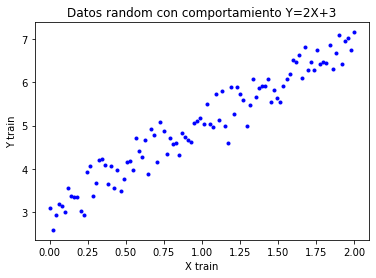

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint, uniform,random

# Creación de data de entrenamiento
n_datos=100
X_train = np.linspace(0, 2, n_datos)
y_train = 3 +2 * X_train + np.random.randn(1,n_datos)[0] * 0.33
plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.plot(X_train,y_train,'b.')
plt.show()

In [6]:
#Optimizacion por Gradiente Descendente

# Definición de los ajustes y parámetros iniciales
num_steps = 4000
learningRate = 0.01
criteria = 1e-8
a = 1
b = 1
# Proceso iterativo
for step in range(0, num_steps):
    a_gradient = 0
    b_gradient = 0
    N = float(len(X_train))
    for i in range(0, len(X_train)):
        a_gradient -= (2/N) * (y_train[i] - (a + b * X_train[i]))
        b_gradient -= (2/N) * (y_train[i] - (a + b * X_train[i])) * X_train[i]
        
    a = a - (learningRate * a_gradient)
    b = b - (learningRate * b_gradient)
    if max(abs(learningRate * a_gradient), abs(learningRate * b_gradient)) < criteria:
        break
    
# Resultados
print('Resultados en : '+str(step)+ ' pasos')
print('Tangente:',b)
print('Coeficiente independiente:',a)

Resultados en : 3990 pasos
Tangente: 1.8612616937502167
Coeficiente independiente: 3.1195579436283394


In [7]:
#Optimizacion por Minimos cuadrados
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
X_train_re=X_train.reshape((len(X_train),1))
y_train_re=y_train.reshape((len(y_train),1))

model = LinearRegression()
model.fit(X_train_re, y_train_re)
tan ,coef =model.coef_ , model.intercept_
print('Tangente:',tan[0][0])
print('Coeficiente independiente:',coef[0])

Tangente: 1.8612589936445145
Coeficiente independiente: 3.1195611415967957


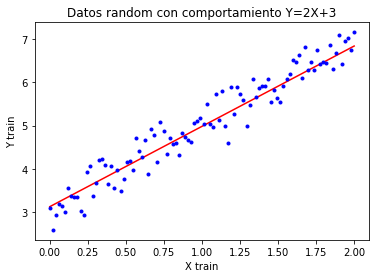

In [14]:
import numpy as np
import matplotlib.pyplot as plt

y_predic=tan[0][0]*X_train+coef[0]

plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X train')
plt.ylabel('Y train')
plt.plot(X_train,y_predic,'r-')
plt.plot(X_train,y_train,'b.')
plt.show()

## 1.3 Metricas de evaluacion del modelo

Para poder evaluar que tan bien predice nuestro modelo de regresion se deben usar metricas de evaluacion. Las mas conocidas son:

*   $MAE$ (Error absoluto medio )

*   $MSE$ (Error cuadratico medio)

*   $RMSE$ (Raiz del error cuadratico medio)
*   $R^2$ ( R-Cuadrado )




***MAE ( Error absoluto medio )***

Esta métrica de regresión es el valor medio de la diferencia absoluta entre el valor real y el valor predicho.

\begin{equation}
MAE=\frac{1}{n}{\sum_{i=1}^m}|y_i-f(x_{1i})|
\end{equation}



***MSE (Error cuadratico medio)***

Esta metrica calcula el valor medio de la diferencia al cuadrado entre el valor real y el predicho para todos los puntos de datos. Todos los valores relacionados se elevan a la segunda potencia, por lo tanto, todos los valores negativos no se compensan con los positivos. Además, debido a las características de esta métrica, ***el impacto de los errores es mayor***.

\begin{equation}
MSE=\frac{1}{n}{\sum_{i=1}^m}(y_i-f(x_{1i}))^2
\end{equation}


***RMSE (Raiz del error cuadratico medio)***

Es la raiz cuadrada del MSE.

\begin{equation}
RMSE=\sqrt{ \frac{1}{n}{\sum_{i=1}^m}(y_i-f(x_{1i}))^2 }
\end{equation}


***R-squared o $R^2$***

El R-Squared o $R^2$ es la proporcion de la varianza en la variable de respuesta que explica el modelo,su valor varia entre 0 y 1. Si es 1 el modelo representa muy bien a los datos , si es 0 es un pesimo modelo para esos datos.

Pd. El $R^2$ se aplica sobre los datos de test

Primero , calcularemos la Suma residual de cuadrados
\begin{equation}
SS_{res}={\sum_{i=1}^m}( y_i-f(x_{1i}) )^2
\end{equation}

Segundo ,  la Suma total de cuadrados
\begin{equation}
SS_{tot}={\sum_{i=1}^m}(y_i-prom(y)))^2
\end{equation}
Finalmente:
\begin{equation}
R^2=1-\frac{SS_{res}}{SS_{tot}}
\end{equation}

###1.3.0 R-Squared ( 7 min - 1 puntos )



Implementar un programa que permite calcular la metrica $R^2$ , para la siguiente data set.

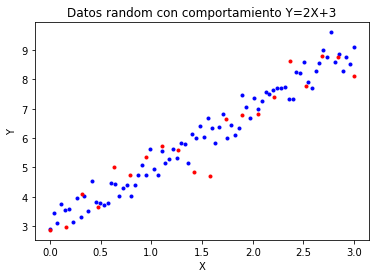

In [16]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from random import randint, uniform,random

###################################################################Creación de data de entrenamiento
n_datos=80
X_train = np.linspace(0, 3, n_datos)
y_train = 3 +2 * X_train + np.random.randn(1,n_datos)[0] * 0.33

n_datos=20
X_test = np.linspace(0, 3, n_datos)
y_test = 3 +2 * X_test + np.random.randn(1,n_datos)[0] * 0.5

plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_train,y_train,'b.')
plt.plot(X_test,y_test,'r.')
plt.show()

###1.3.1 R-Squared ( Solucion - Numpy )

In [10]:
#Optimizacion por Gradiente Descendente

# Definición de los ajustes y parámetros iniciales
num_steps = 10000
learningRate = 0.01
criteria = 1e-8
a = 1
b = 1
# Proceso iterativo
for step in range(0, num_steps):
    a_gradient = 0
    b_gradient = 0
    N = float(len(X_train))
    for i in range(0, len(X_train)):
        a_gradient -= (2/N) * (y_train[i] - (a + b * X_train[i]))
        b_gradient -= (2/N) * (y_train[i] - (a + b * X_train[i])) * X_train[i]
        
    a = a - (learningRate * a_gradient)
    b = b - (learningRate * b_gradient)
    if max(abs(learningRate * a_gradient), abs(learningRate * b_gradient)) < criteria:
        break
    
# Resultados
print('Resultados en '+str(step)+ ' pasos')
print('Tangente:',b)
print('Coeficiente independiente:',a)

prediccion=a+b*X_test
prom_y=sum(y_test)/len(y_test)

SS_res=sum((y_test-prediccion)**2)
SS_tot=sum((y_test-prom_y)**2)

R_2=1-(SS_res/SS_tot)
print(R_2)

Resultados en 3252 pasos
Tangente: 1.965348976993186
Coeficiente independiente: 3.113784783638356
0.9662367756649914


### 1.3.2 R-Squared ( Solucion - Sklearn )

In [11]:
from sklearn.linear_model import LinearRegression

X_train_re=X_train.reshape((len(X_train),1))
y_train_re=y_train.reshape((len(y_train),1))

X_test_re=X_test.reshape((len(X_test),1))
y_test_re=y_test.reshape((len(y_test),1))

model = LinearRegression()
model.fit(X_train_re, y_train_re)
#prediccion=model.predict(X_test_re, y_test_re)
R_2=model.score(X_test_re, y_test_re)
print ('R-squared: '+str(R_2) )

R-squared: 0.9662366755085219


## 1.4 Tarea 1

Hallar el modelo que tenga la mejor prediccion , para eso se planteara tres modelos.
*   Modelo 1 : El modelo de regresion lineal simple cuyos parametros son ***a*** y ***b***
*   Modelo 2 : Una vez obtenidos el modelo 1 , variar los parametros + 5 % . 
*   Modelo 3 : Una vez obtenidos el modelo 1 , variar los parametros - 5 % .

Los datos a usar son :

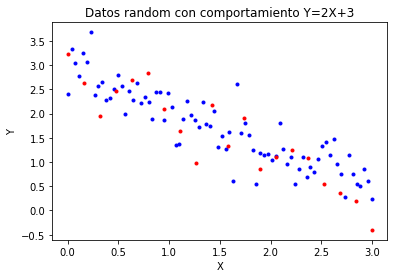

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from random import randint, uniform,random

###################################################################Creación de data de entrenamiento
n_datos=80
X_train = np.linspace(0, 3, n_datos)
y_train = 3 -0.9 * X_train + np.random.randn(1,n_datos)[0] * 0.33

n_datos=20
X_test = np.linspace(0, 3, n_datos)
y_test = 3 -0.9 * X_test + np.random.randn(1,n_datos)[0] * 0.4


plt.title('Datos random con comportamiento Y=2X+3')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(X_train,y_train,'b.')
plt.plot(X_test,y_test,'r.')
plt.show()